# Example of MetaX in `Command-line`

Set the path of the MetaX folder in the `PATH` environment variable.

In [3]:
import sys
import os
myDir = os.getcwd()
parentDir = os.path.abspath(os.path.join(myDir, os.pardir))
sys.path.append(parentDir)

from pathlib import Path
path = Path(parentDir)
a=str(path.parent.absolute())

sys.path.append(a)

Import the libraries from the MetaX folder

In [4]:
from MetaX.utils.TaxaFuncAnalyzer import TaxaFuncAnalyzer

Create a new OTF object.

In [5]:
df_path = '../data/example_data/Example_OTF.tsv'
meta_path = '../data/example_data/Example_Meta.tsv'
sw = TaxaFuncAnalyzer(df_path, meta_path, any_df_mode=False)

original df shape: (5000, 256)
after remove all zero row: (4723, 256)


Set `function` and `multi tables` 


# set_multi_tables()
Sets multiple tables including Function table, Taxa table, and Taxa-Function table.

Parameters:
- `level (str)`: The taxonomic level to consider. Default is 's' (species).
- `func_threshold (float)`: The threshold for function proportion. Default is 1.00.
- `processing_after_sum (bool)`: Whether to perform data preprocessing after summing protein intensity. Default is False.
- `data_preprocess_params (dict)`: Parameters for data preprocessing. Default is {'normalize_method': None, 'transform_method': None,
                                    'batch_meta': None, 'outlier_detect_method': None, 'outlier_handle_method': None,
                                    'outlier_detect_by_group': None, 'outlier_handle_by_group': None, 'processing_order': None}.
- `peptide_num_threshold (dict)`: Thresholds for peptide numbers in Function table, Taxa table, and Taxa-Function table.
                                Default is {'taxa': 1, 'func': 1, 'taxa_func': 1}.
- `sum_protein (bool)`: Whether to sum protein intensity. Default is False.
- `sum_protein_params (dict)`: Parameters for summing protein intensity. Default is {'method': 'razor', 'by_sample': False,
                                'rank_method': 'unique_counts'}.


In [6]:
sw.set_func('KEGG_ko')

# sw.set_group('Person')
# sw.set_group('Person')
sw.set_multi_tables(level='s', data_preprocess_params = {'normalize_method': None, 'transform_method': "log10",
                                                            'batch_meta': None, 'outlier_detect_method': None,
                                                            'outlier_handle_method': None,
                                                            'outlier_detect_by_group': None,
                                                            'outlier_handle_by_group': None,
                                                            'processing_order': None},
                    peptide_num_threshold = {'taxa': 3, 'func': 1, 'taxa_func': 1},
                    sum_protein=False)
# sw.set_multi_tables(level='s', sum_protein=True, sum_protein_params= { 'method': 'razor', 'by_sample': False, 'rank_method': 'unique'})


[2024-04-19 22:35:40] Start to detect outlier...
outlier_method is not set, outlier detection did not perform.

[2024-04-19 22:35:40] Start to handle missing value...

No missing value, skip outlier handling
Data transformed by [log10]
normalize_method is not set, data normalization did not perform.
batch_meta is not set, Batch effect removal did not perform.

[2024-04-19 22:35:40] -----Data preprocessing finished.-----

Original data shape: (4723, 256)
Starting to set Function table...
Function number with prop >= [1.0], peptide_num >= [1]: 613
Starting to set Taxa table...
Remove the peptides with 's__'in Taxon column...
Rmoved: [50], Left: [2077]
Taxa number with 's' level, peptide_num >= [3]: 142
Taxa-Function number with peptide_num >= [1]: 1240


Multi-tables Created!
Waiting for further analysis...


Check meta table

In [7]:
sw.meta_df

,Sample,Individual,Sugar_name,Sugar_source,Sugar_type,full_name
0,V1_01,V1,PBS,PBS,PBS,PBS
1,V1_02,V1,ISO,sugar alcohols,CHO,Isomalt
2,V1_03,V1,SOR,sugar alcohols,CHO,Sorbitol (D-Sorbitol)
3,V1_04,V1,ERY,sugar alcohols,CHO,Erythritol (meso-Erythritol)
4,V1_05,V1,HSH,sugar alcohols,CHO,Hydrogenated starch hydrolysates
...,...,...,...,...,...,...
185,V5_34,V5,ACE2,synthetic,NAS,Acesulfame K
186,V5_35,V5,ASP,synthetic,NAS,Aspartame
187,V5_36,V5,NEO006,synthetic,NAS,Neotame
188,V5_37,V5,PBS,PBS,PBS,PBS


In [8]:
sw.set_group('Individual')

group is set to Individual
 {'V4', 'V3', 'V2', 'V5', 'V1'}


Check the attributes of the OTF object

In [9]:
sw.check_attributes()

Set:
  original_row_num
  original_df
  preprocessed_df
  genome_mode
  peptide_col_name
  protein_col_name
  custom_col_name
  sample_list
  meta_df
  meta_name
  group_list
  group_dict
  func_list
  func_name
  taxa_level
  clean_df
  peptide_df
  taxa_df
  func_df
  taxa_func_df
  func_taxa_df
  taxa_func_linked_dict
  func_taxa_linked_dict
  any_df_mode
  outlier_status
  BasicStats
  CrossTest
  GetMatrix
  data_preprocess

Not set:
  protein_df
  custom_df



Use the `get_df` method to get the Taxa, Function, OTFs, and Peptides tables
Get the dataframe without peptide_num column

### Parameters:
- table_name (str): The name of the table to retrieve. Valid options are:
    - `peptide`: Returns the peptide_df table.
    - `taxa`: Returns the taxa_df table.
    - `func`: Returns the func_df table.
    - `taxa_func`: Returns the taxa_func_df table.
    - `func_taxa`: Returns the func_taxa_df table.
    - `custom`: Returns the custom_df table.

Returns:
- `pandas.DataFrame`


In [10]:
sw.get_df(table_name='taxa')

,V1_01,V1_02,V1_03,V1_04,V1_05,V1_06,V1_07,V1_08,V1_09,V1_10,...,V5_29,V5_30,V5_31,V5_32,V5_33,V5_34,V5_35,V5_36,V5_37,V5_38
Taxon,,,,,,,,,,,,,,,,,,,,,
d__Bacteria|p__Actinobacteriota|c__Actinomycetia|o__Actinomycetales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium breve,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d__Bacteria|p__Actinobacteriota|c__Actinomycetia|o__Actinomycetales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium infantis,16.183636,10.812076,11.049976,5.644996,15.628914,5.744100,10.723522,20.975569,15.672211,16.126363,...,6.288318,10.884920,6.244498,6.126786,11.486956,5.490943,5.350009,6.099021,6.471158,5.237164
d__Bacteria|p__Actinobacteriota|c__Actinomycetia|o__Actinomycetales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium pseudocatenulatum,12.054001,11.335050,27.482199,16.934216,27.781208,6.023990,15.843673,27.249244,16.355069,31.296907,...,0.000000,17.176741,16.933785,0.000000,17.213315,17.256169,17.314665,5.446379,17.052523,11.862123
d__Bacteria|p__Actinobacteriota|c__Coriobacteriia|o__Coriobacteriales|f__Coriobacteriaceae|g__Collinsella|s__Collinsella sp002232035,5.636565,0.000000,0.000000,0.000000,0.000000,0.000000,5.969185,0.000000,5.935355,0.000000,...,0.000000,0.000000,0.000000,6.201118,0.000000,6.432815,0.000000,0.000000,0.000000,0.000000
d__Bacteria|p__Actinobacteriota|c__Coriobacteriia|o__Coriobacteriales|f__Coriobacteriaceae|g__Collinsella|s__Collinsella sp900762015,10.357103,11.427788,10.702306,11.147653,10.530633,10.655898,11.176484,10.427058,10.764109,10.841331,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Burkholderiales|f__Burkholderiaceae|g__Sutterella|s__Sutterella wadsworthensis_A,5.537005,0.000000,5.396517,15.952336,5.725157,10.774005,15.389687,5.488161,16.190256,0.000000,...,29.003402,23.803587,29.145012,22.523565,16.669160,29.436753,31.206389,28.907563,29.369341,28.803598
d__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacterales|f__Enterobacteriaceae|g__Citrobacter_B|s__Citrobacter_B koseri,103.467647,124.605493,84.590375,116.089681,101.012386,122.732646,114.255928,106.945089,109.529851,117.288714,...,110.789144,100.336612,99.840889,78.066037,84.595420,67.846670,90.925943,88.525106,85.691870,94.710067
d__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacterales|f__Enterobacteriaceae|g__Escherichia|s__Escherichia coli_D,73.849151,77.820968,75.834942,66.028261,71.940824,89.955754,98.810119,74.550495,72.800151,91.594024,...,41.772390,27.360240,21.515232,21.561663,26.724105,21.855066,27.614946,32.540988,20.911921,22.220936


Use basic Statistics

In [11]:
sw.BasicStats.get_stats_peptide_num_in_taxa()

,LCA_level,count,freq,label
0,genome,2120,44.89,genome (44.89%)
1,species,7,0.15,species (0.15%)
2,genus,1040,22.02,genus (22.02%)
3,family,812,17.19,family (17.19%)
4,order,208,4.40,order (4.4%)
5,class,140,2.96,class (2.96%)
6,phylum,58,1.23,phylum (1.23%)
7,domain,329,6.97,domain (6.97%)
8,life,9,0.19,life (0.19%)
9,notFound,0,0.00,notFound (0.0%)


In [12]:
sw.BasicStats.get_stats_taxa_level()

,taxa_level,count
0,domain,2
1,phylum,14
2,class,17
3,order,35
4,family,58
5,genus,182
6,species,349
7,genome,384


In [13]:
sw.BasicStats.get_stats_func_prop(func_name='KEGG_Pathway')

,prop,n,freq,label
0,0-0.1,0,0.00,0-0.1 (0.0%)
1,0-0.2,0,0.00,0-0.2 (0.0%)
2,0-0.3,0,0.00,0-0.3 (0.0%)
3,0-0.4,1,0.03,0-0.4 (0.03%)
4,0-0.5,1,0.03,0-0.5 (0.03%)
5,0.5-0.6,40,1.33,0.5-0.6 (1.33%)
6,0.6-0.7,34,1.13,0.6-0.7 (1.13%)
7,0.7-0.8,18,0.60,0.7-0.8 (0.6%)
8,0.8-0.9,27,0.90,0.8-0.9 (0.9%)
9,0.9-1,58,1.93,0.9-1 (1.93%)


Use class `BasicPlot` to plot PCA, Heatmap, Correlation, Boxplot, and other plots

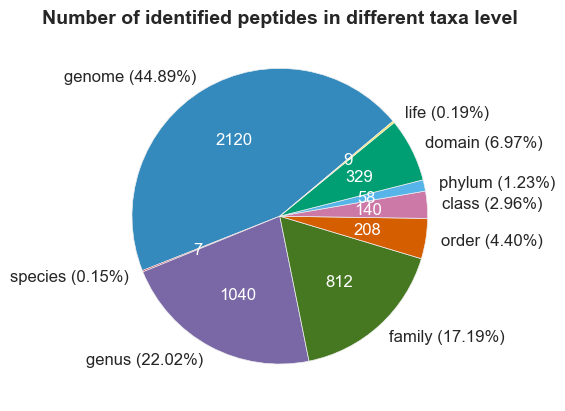

In [14]:
from MetaX.utils.TaxaFuncPloter.basic_plot import BasicPlot

BasicPlot(sw).plot_taxa_stats_pie(theme='bmh')

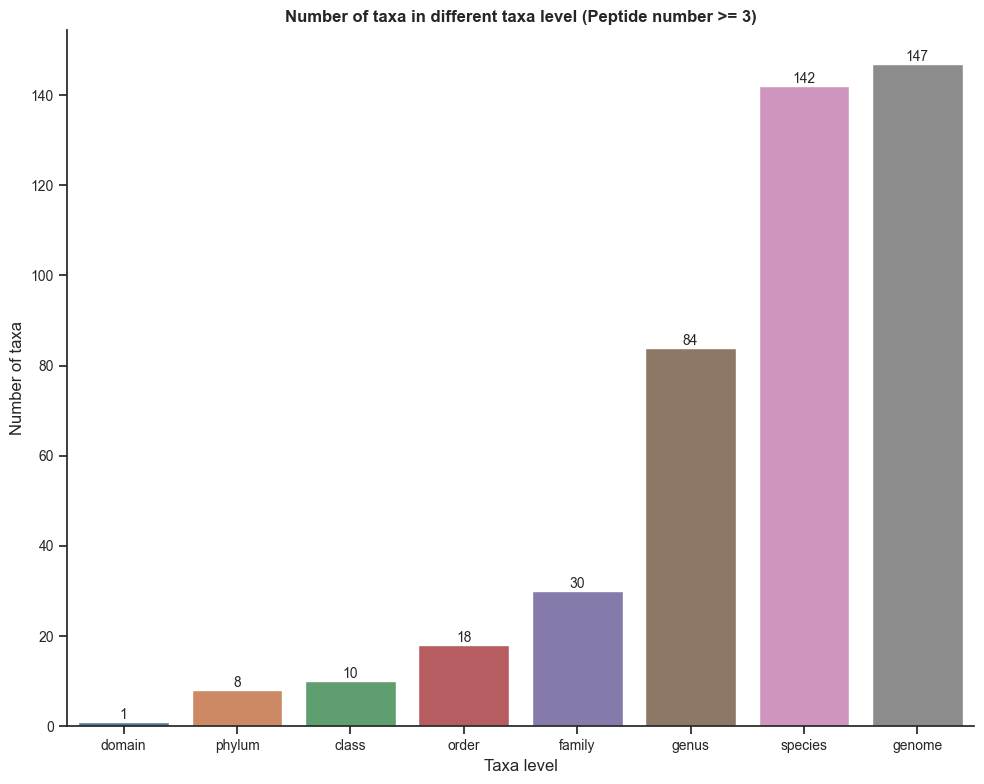

<Axes: title={'center': 'Number of taxa in different taxa level (Peptide number >= 3)'}, xlabel='Taxa level', ylabel='Number of taxa'>

In [15]:
BasicPlot(sw).plot_taxa_number(theme='Auto', peptide_num=3, res_type='show')

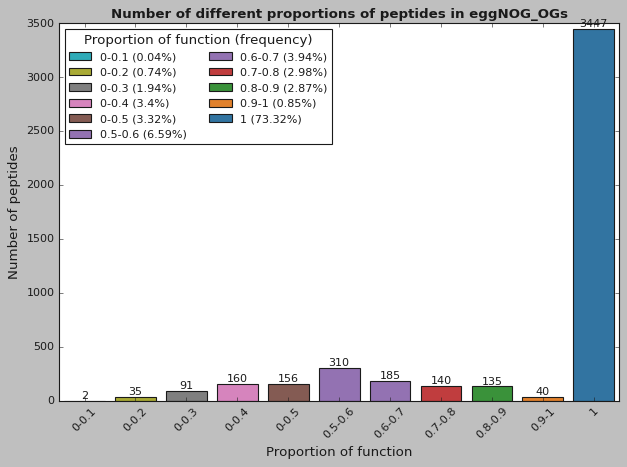

<Axes: title={'center': 'Number of different proportions of peptides in eggNOG_OGs'}, xlabel='Proportion of function', ylabel='Number of peptides'>

In [16]:
BasicPlot(sw).plot_prop_stats(func_name = 'eggNOG_OGs', res_type='show', font_size=10, theme='classic')

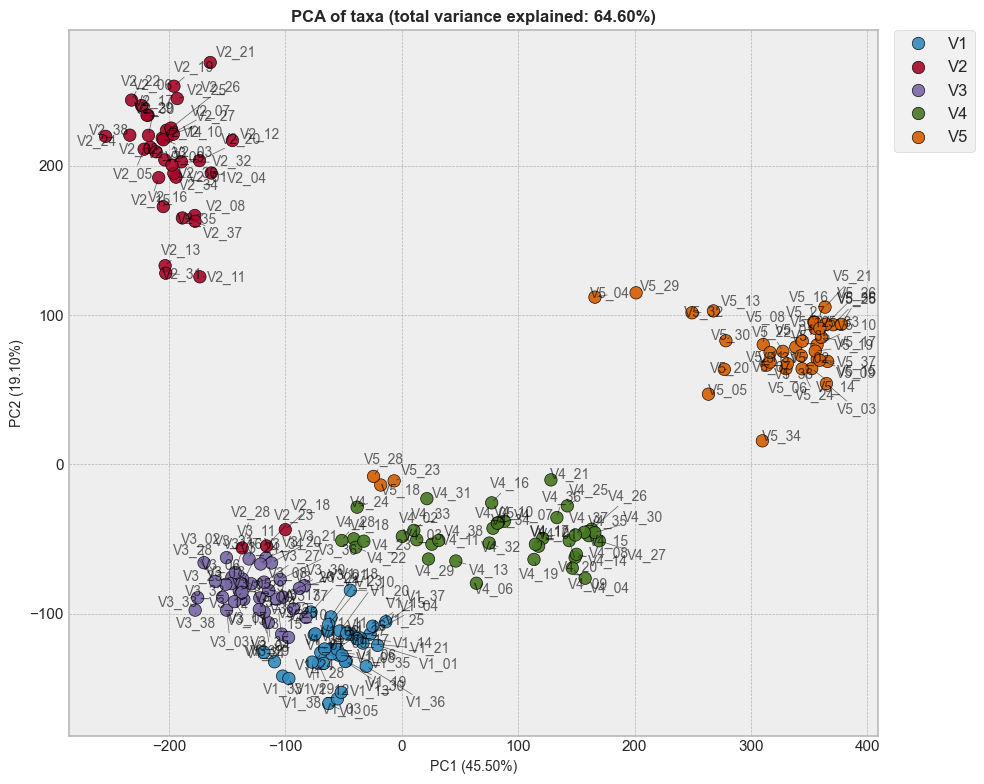

<Axes: title={'center': 'PCA of taxa (total variance explained: 64.60%)'}, xlabel='PC1 (45.50%)', ylabel='PC2 (19.10%)'>

In [17]:
BasicPlot(sw).plot_pca_sns(df=sw.get_df(table_name='taxa'), title_name='taxa', 
                           show_label=True, width=10, height=8, font_size=10, rename_sample=False, 
                           font_transparency=0.6, adjust_label=True, theme='bmh',
                           sub_meta='None', legend_col_num=None, dot_size=None)

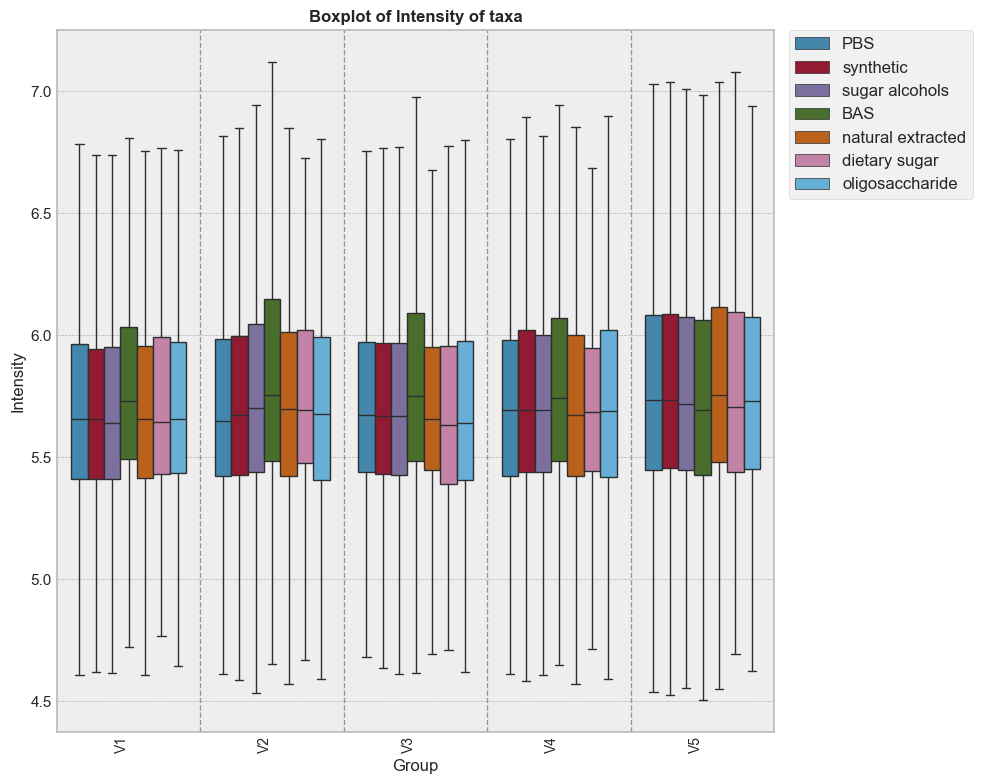

<Axes: title={'center': 'Boxplot of Intensity of taxa'}, xlabel='Group', ylabel='Intensity'>

In [19]:

        
BasicPlot(sw).plot_box_sns(df=sw.get_df(table_name='taxa_func'), title_name='taxa', show_fliers=False, 
                           width=10, height=8, font_size=10, theme='bmh', rename_sample=False, 
                           plot_samples=False, legend_col_num=1, sub_meta='Sugar_source')

The min number of Functions:
Group SubGroup  Number
   V4      BAS     389
The max number of Functions:
Group SubGroup  Number
   V2      CHO     544


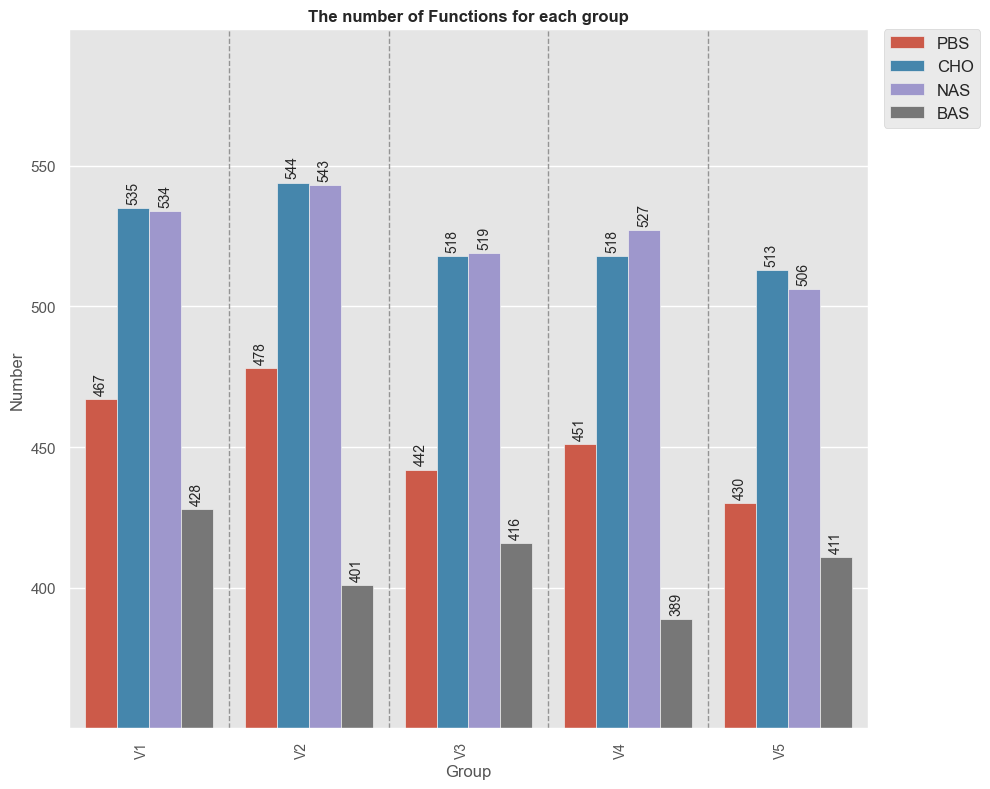

<Axes: title={'center': 'The number of Functions for each group'}, xlabel='Group', ylabel='Number'>

In [21]:
BasicPlot(sw).plot_number_bar(df=sw.get_df(table_name='func'), title_name='Functions', 
                              width=10, height=8, font_size=10, theme='ggplot',
                              plot_sample=False, show_label=True, rename_sample=False, 
                              legend_col_num=None, sub_meta='Sugar_type')

In [22]:
from MetaX.utils.TaxaFuncPloter.heatmap_plot import HeatmapPlot

input group order: ['V1', 'V2', 'V3', 'V4', 'V5']
samples used: ['V1_01', 'V1_02', 'V1_03', 'V1_04', 'V1_05', 'V1_06', 'V1_07', 'V1_08', 'V1_09', 'V1_10', 'V1_11', 'V1_12', 'V1_13', 'V1_14', 'V1_15', 'V1_16', 'V1_17', 'V1_18', 'V1_19', 'V1_20', 'V1_21', 'V1_22', 'V1_23', 'V1_24', 'V1_25', 'V1_26', 'V1_27', 'V1_28', 'V1_29', 'V1_30', 'V1_31', 'V1_32', 'V1_33', 'V1_34', 'V1_35', 'V1_36', 'V1_37', 'V1_38', 'V2_01', 'V2_02', 'V2_03', 'V2_04', 'V2_05', 'V2_06', 'V2_07', 'V2_08', 'V2_09', 'V2_10', 'V2_11', 'V2_12', 'V2_13', 'V2_14', 'V2_15', 'V2_16', 'V2_17', 'V2_18', 'V2_19', 'V2_20', 'V2_21', 'V2_22', 'V2_23', 'V2_24', 'V2_25', 'V2_26', 'V2_27', 'V2_28', 'V2_29', 'V2_30', 'V2_31', 'V2_32', 'V2_33', 'V2_34', 'V2_35', 'V2_36', 'V2_37', 'V2_38', 'V3_01', 'V3_02', 'V3_03', 'V3_04', 'V3_05', 'V3_06', 'V3_07', 'V3_08', 'V3_09', 'V3_10', 'V3_11', 'V3_12', 'V3_13', 'V3_14', 'V3_15', 'V3_16', 'V3_17', 'V3_18', 'V3_19', 'V3_20', 'V3_21', 'V3_22', 'V3_23', 'V3_24', 'V3_25', 'V3_26', 'V3_27', 'V3_28',

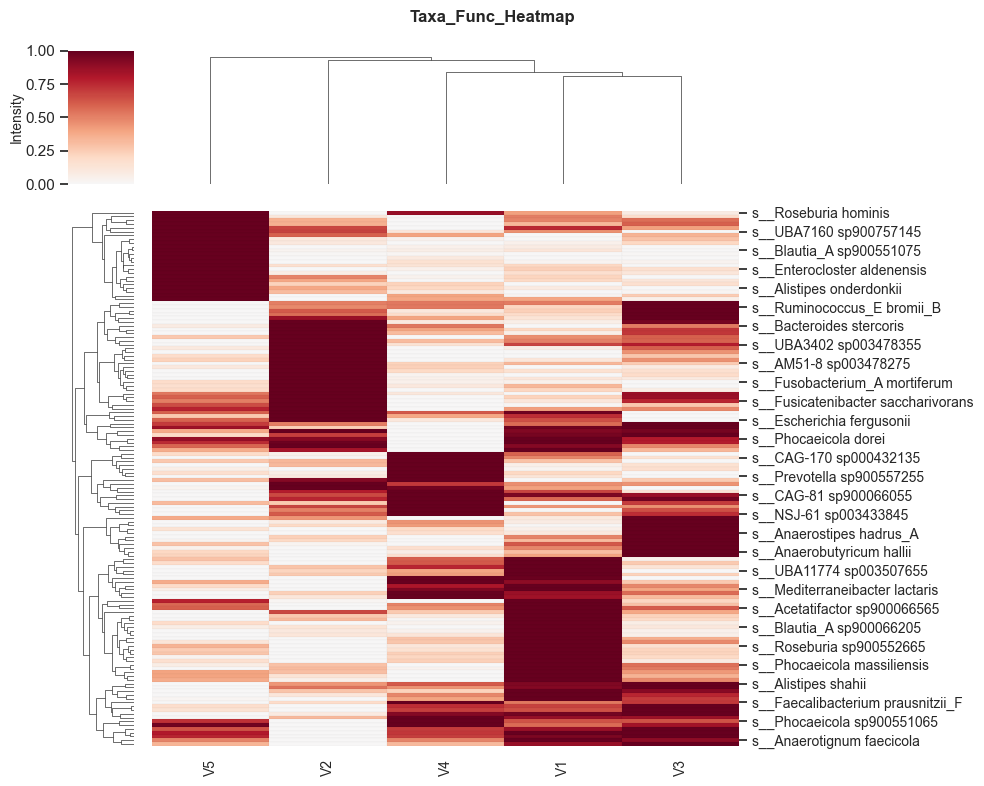

In [33]:

HeatmapPlot(sw).plot_basic_heatmap(df=sw.get_df(table_name='taxa'), title='Taxa_Func_Heatmap',
                                      fig_size=(10, 8), scale='row', col_cluster=True, row_cluster=True, cmap='RdBu_r',
                                      rename_taxa=True, font_size=10, show_all_labels=(False, False), rename_sample=False, plot_mean=True)


## Statistical Analysis

T-test, ANOVA, and other statistical tests

In [ ]:
#TODO: add more examples